In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
from sklearn import metrics
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm

Bad key "text.kerning_factor" on line 4 in
C:\Users\Hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

Using TensorFlow backend.


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

In [54]:
train = pd.read_csv("D:train.csv")

In [55]:
train

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1
...,...,...,...,...,...,...,...,...
538,16,74.017,7,4,5,7,1,0
539,2,70.460,7,5,6,4,0,0
540,1,79.243,7,5,3,8,1,0
541,40,69.140,7,8,4,5,1,1


In [56]:
train.shape

(543, 8)

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  543 non-null    int64  
 1   Location_Score        543 non-null    float64
 2   Internal_Audit_Score  543 non-null    int64  
 3   External_Audit_Score  543 non-null    int64  
 4   Fin_Score             543 non-null    int64  
 5   Loss_score            543 non-null    int64  
 6   Past_Results          543 non-null    int64  
 7   IsUnderRisk           543 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 34.1 KB


In [58]:
train.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


In [59]:
train.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

In [ ]:
train['IsUnderRisk'].value_counts()

In [ ]:
print('Risk = 0', round(train['IsUnderRisk'].value_counts()[0]/len(train) * 100,2), '% of the dataset')
print('Risk = 1', round(train['IsUnderRisk'].value_counts()[1]/len(train) * 100,2), '% of the dataset')

In [ ]:
sn.countplot(x='IsUnderRisk',data=train)

In [ ]:
categorical = train.select_dtypes(include=['object'])
categorical

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(train,train.columns,6,4)

In [ ]:
train.boxplot(by ='IsUnderRisk', column =['Internal_Audit_Score','External_Audit_Score',
                                          'Fin_Score','Loss_score'], grid = False)

In [ ]:

plt.figure(figsize= (20, 10))
sns.heatmap(train.corr(),annot = True)

In [60]:
X = train.drop('IsUnderRisk', axis=1)
y = train['IsUnderRisk']

In [ ]:
y.value_counts()

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os =RandomOverSampler(1)

In [ ]:
X, y = os.fit_sample(X, y)

In [ ]:
X.shape

In [ ]:
y.value_counts()

In [ ]:
X.shape

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [63]:
X_train.shape

(434, 7)

In [64]:
X_test.shape

(109, 7)

In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty = 'l2',random_state = 12,C=0.2) 
logreg.fit(X_train, Y_train) 
predictions = logreg.predict(X_test) 
  
# print classification report 
print(classification_report(Y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.80      0.64      0.71        50
           1       0.74      0.86      0.80        59

    accuracy                           0.76       109
   macro avg       0.77      0.75      0.75       109
weighted avg       0.77      0.76      0.76       109



C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [66]:
import sklearn

In [67]:
sklearn.metrics.accuracy_score(Y_test,predictions)

0.7614678899082569

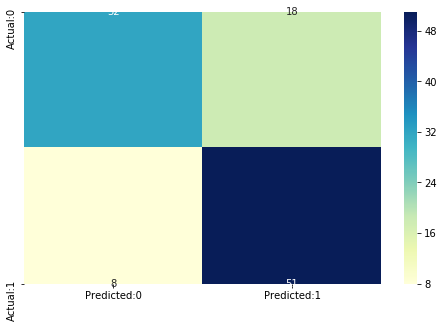

In [68]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [41]:

TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [42]:
TN+FP

186

In [43]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.6948529411764706 

 The Miss-classification = 1-Accuracy =  0.30514705882352944 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.08139534883720931 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.978494623655914 

 Positive Predictive value = TP / (TP+FP) =  0.6363636363636364 

 Negative predictive Value = TN / (TN+FN) =  0.6973180076628352 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  3.784883720930236 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.9387937643751597


In [70]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [71]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(X_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(Y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[ 3 47]
 [ 0 59]] 
 with 62 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.06 



With 0.2 threshold the Confusion Matrix is  
 [[ 8 42]
 [ 1 58]] 
 with 66 correct predictions and 1 Type II errors( False Negatives) 

 Sensitivity:  0.9830508474576272 Specificity:  0.16 



With 0.3 threshold the Confusion Matrix is  
 [[16 34]
 [ 2 57]] 
 with 73 correct predictions and 2 Type II errors( False Negatives) 

 Sensitivity:  0.9661016949152542 Specificity:  0.32 



With 0.4 threshold the Confusion Matrix is  
 [[21 29]
 [ 5 54]] 
 with 75 correct predictions and 5 Type II errors( False Negatives) 

 Sensitivity:  0.9152542372881356 Specificity:  0.42 





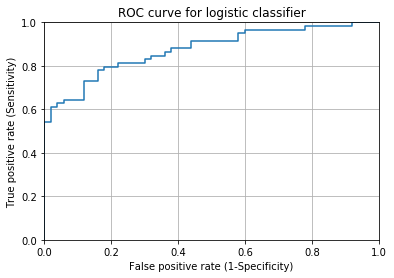

In [72]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for logistic classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [73]:
sklearn.metrics.roc_auc_score(Y_test, y_pred_prob_yes[:,1])

0.8752542372881357

In [74]:
sklearn.metrics.log_loss(Y_test, y_pred_prob_yes[:,1])

0.4663537033410076

### Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [ ]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=5, min_samples_leaf=5)

giniDecisionTree.fit(X_train, Y_train)

In [ ]:
giniPred = giniDecisionTree.predict(X_test) 

In [ ]:
print('Accuracy Score: ',accuracy_score(Y_test, giniPred))

In [ ]:
print('Classification Report')
print(classification_report(Y_test, giniPred))

### RandomForest

In [49]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV

In [50]:
fit_rf = RandomForestClassifier(random_state=100)

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
import time
import random
np.random.seed(100)
start = time.time()

parameters = {'max_depth': [2, 3, 4,5,6,7,8],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None],'criterion': ['gini', 'entropy']}

cv_rf = RandomizedSearchCV(fit_rf,parameters, n_jobs = 4,scoring="neg_log_loss ")



cv_rf.fit(X_train, Y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Parameters using grid search: 
 {'max_features': None, 'max_depth': 7, 'criterion': 'entropy', 'bootstrap': True}
Time taken in grid search:  28.87


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
fit_rf.set_params(criterion = 'gini',max_features = 'Auto',max_depth = 8,bootstrap = 'True',min_samples_leaf=6)

In [ ]:
fit_rf.set_params(n_estimators=1000,
                  warm_start=False, 
                  oob_score=False)

In [ ]:
fit_rf.fit(X_train, Y_train)

In [ ]:
predictions_rf = fit_rf.predict(X_test)

In [ ]:
print('Accuracy Score: ',accuracy_score(Y_test, predictions_rf))

In [ ]:
y_pred_prob_yes=fit_rf.predict_proba(X_test)

In [ ]:
import sklearn

In [ ]:
sklearn.metrics.roc_auc_score(Y_test, y_pred_prob_yes[:,1])

In [ ]:
sklearn.metrics.log_loss(Y_test, y_pred_prob_yes[:,1])

In [ ]:
err = []
logloss = []
y_pred_tot_lgm = []
from sklearn.model_selection import StratifiedKFold

fold = StratifiedKFold(n_splits=5)
i = 1
for train_index, test_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    m = RandomForestClassifier(random_state=12,criterion = 'gini',max_features = 'auto',max_depth = 8,bootstrap = 'True',min_samples_leaf=6,warm_start=False,oob_score=False,n_estimators=1000)
    m.fit(x_train, y_train)
          
    pred_y = m.predict_proba(x_val)[:,1]
    print("err_lgm: ",roc_auc_score(y_val,pred_y))
    err.append(roc_auc_score(y_val, pred_y))
    logloss.append(sklearn.metrics.log_loss(Y_test, pred_y))

In [ ]:
np.mean(err,0)

In [ ]:
y_pred_prob_yes=fit_rf.predict_proba(test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob_yes, columns=['0','1'])
y_pred_prob_df

In [ ]:
y_pred_prob_df.to_excel('E:/sub_2.xlsx',index=False)

### XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.01 ,0.02 ,0.03,0.04,0.05 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10,13],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
    "scale_pos_weight" : [1,10,25,50,75,99,100]
     }

grid = RandomizedSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=5)

grid.fit(X_train, Y_train)


print('Best Parameters using grid search: \n', grid.best_params_)

### Bayesian

In [ ]:

from bayes_opt import BayesianOptimization

In [ ]:
def bayesian_optimization(train, function, parameters):
    
    X_train, y_train, X_test, y_test = train
    n_iterations = 5
    gp_params = {"alpha": 1e-4}

    BO = BayesianOptimization(function, parameters)
    BO.maximize(n_iter=n_iterations, **gp_params)

    return BO.max

In [ ]:
 def xgb_optimization(cv_splits, eval_set):
    def function(eta, gamma, max_depth):
            return cross_val_score(
                   xgb.XGBClassifier(
                       objective="binary:logistic",
                       learning_rate=max(eta, 0),
                       gamma=max(gamma, 0),
                       max_depth=int(max_depth),                                               
                       seed=42,
                       nthread=-1,
                       scale_pos_weight = len(y_train[y_train == 0])/
                                          len(y_train[y_train == 1])),  
                   X=X_train, 
                   y=y_train, 
                   cv=cv_splits,
                   scoring="roc_auc",
                   fit_params={
                        "early_stopping_rounds": 10, 
                        "eval_metric": "auc", 
                        "eval_set": eval_set},
                   n_jobs=-1).mean()

    parameters = {"eta": (0.001, 0.4),
                  "gamma": (0, 20),
                  "max_depth": (1, 2000)}
    
    return function, parameters

In [ ]:
def train(X_train, y_train, X_test, y_test, function, parameters):
    dataset = (X_train, y_train, X_test, y_test)
    cv_splits = 4
    
    best_solution = bayesian_optimization(dataset, function, parameters)      
    params = best_solution["params"]

    model = RandomForestClassifier(
             n_estimators=int(max(params["n_estimators"], 0)),
             max_depth=int(max(params["max_depth"], 1)),
             min_samples_split=int(max(params["min_samples_split"], 2)), 
             n_jobs=-1, 
             random_state=42,   
             class_weight="balanced")

    model.fit(X_train, y_train)
    
    return model

In [ ]:
y_pred_prob_yes=model.predict_proba(X_test)

In [ ]:
sklearn.metrics.roc_auc_score(Y_test, y_pred_prob_yes[:,1])

In [ ]:
sklearn.metrics.log_loss(Y_test, y_pred_prob_yes[:,1])

In [ ]:
y_pred_prob_yes=model.predict_proba(test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob_yes, columns=['0','1'])
y_pred_prob_df.head(50)

In [ ]:
y_pred_prob_df.to_excel('E:/sub_18.xlsx',index=False)

### XGB

In [ ]:
clf = xgb.XGBClassifier(min_child_weight=1, max_depth= 3, gamma= 0.2, eta=0.15, colsample_bytree=0.5,n_estimators=100,random_state = 42,booster = 'gbtree')
#'min_child_weight': 1, 'max_depth': 3, 'gamma': 0.2, 'eta': 0.15, 'colsample_bytree': 0.5,n_estimators=100,random_state = 42

In [ ]:
params = {'num_leaves': 256,
          'min_child_samples': 79,
          'objective': 'binary',
          'max_depth': 13,
          'learning_rate': 0.03,
          "boosting_type": "gbdt",
          "subsample_freq": 3,
          "subsample": 0.9,
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3,
          'reg_lambda': 0.3,
          'colsample_bytree': 0.9,
          #'categorical_feature': cat_cols
         }
result_dict_lgb = train_model_classification(X=X, X_test=X_test, y=y, params=params, folds=folds, model_type='lgb', eval_metric='auc', plot_feature_importance=True,
                                                      verbose=500, early_stopping_rounds=200, n_estimators=5000, averaging='usual', n_jobs=-1)

In [ ]:
clf.fit(X_train,Y_train)

In [ ]:
'scale_pos_weight': 1, 'min_child_weight': 5, 'max_depth': 3, 'gamma': 0.1, 'eta': 0.04, 'colsample_bytree': 0.7

In [ ]:
#{'min_child_weight': 1, 'max_depth': 3, 'gamma': 0.2, 'eta': 0.15, 'colsample_bytree': 0.5,n_estimators=100,random_state = 42} #945,280

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
y_pred_prob_yes=clf.predict_proba(X_test)

In [ ]:
sklearn.metrics.roc_auc_score(Y_test, y_pred_prob_yes[:,1])

In [ ]:
sklearn.metrics.log_loss(Y_test, y_pred_prob_yes[:,1])

In [ ]:
y_pred_prob_yes=clf.predict_proba(test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob_yes, columns=['0','1'])
y_pred_prob_df.head()

In [ ]:
y_pred_prob_df.to_excel('E:/sub_96.xlsx',index=False)

In [ ]:
y_pred_prob_yes=clf.predict_proba(test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob_yes, columns=['0','1'])
y_pred_prob_df.head()

In [ ]:
y_pred_prob_df.to_excel('E:/sub_112.xlsx',index=False)

In [ ]:
err = []
logloss = []
y_pred_tot_lgm = []
from sklearn.model_selection import StratifiedKFold

fold = StratifiedKFold(n_splits=5)
i = 1
for train_index, test_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    m = xgb.XGBClassifier(min_child_weight= 1, max_depth= 12, gamma= 0.3, eta= 0.3, colsample_bytree=0.5,n_estimators=5000)
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          eval_metric='auc',
          verbose=200)
    pred_y = m.predict_proba(x_val)[:,1]
    print("err_lgm: ",roc_auc_score(y_val,pred_y))
    err.append(roc_auc_score(y_val, pred_y))
    logloss.append(sklearn.metrics.log_loss(Y_test, pred_y))
    
    
    

### xgagain

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=1,
              learning_rate=0.02, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.8, verbosity=1)  best estimator for 99

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
xgb = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,Y_train), verbose=3, random_state=1001 )


random_search.fit(X_train, Y_train)


In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)

In [ ]:
y_pred_prob_yes=random_search.predict_proba(X_test)

In [ ]:
sklearn.metrics.roc_auc_score(Y_test, y_pred_prob_yes[:,1])

In [ ]:
sklearn.metrics.log_loss(Y_test, y_pred_prob_yes[:,1])

In [ ]:
y_pred_prob_yes=random_search.predict_proba(test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob_yes, columns=['0','1'])
y_pred_prob_df.head()

In [ ]:
y_pred_prob_df.to_excel('E:/sub_97.xlsx',index=False)

### LGBM

In [ ]:
import lightgbm as lgb

In [ ]:
model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50,bagging_fraction= 0.6,feature_fraction = 0.8,max_depth = 8,eval_metric='logloss',max_bin = 230,colsample_bytree=0.5)

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
pred=model.predict_proba(X_test)[:,1]

In [ ]:
sklearn.metrics.roc_auc_score(Y_test, pred)

In [ ]:
sklearn.metrics.log_loss(Y_test, pred)

### CAT boost

In [ ]:
from catboost import CatBoostClassifier,Pool

In [ ]:
model = CatBoostClassifier(
        iterations=5000,logging_level="Silent",early_stopping_rounds=500,custom_loss=["AUC"], 
        eval_metric="AUC",max_depth=6,learning_rate=0.01,loss_function = 'Logloss')

In [ ]:
parameters = {
     "learning_rate"    : [0.01,0.02,0.05, 0.08] ,
     "max_depth"        : [ 3, 4, 5, 6]
     
     }

grid = RandomizedSearchCV(model,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=5)

grid.fit(X_train, Y_train)


print('Best Parameters using grid search: \n', grid.best_params_)

In [ ]:
thread_count=2,
                         loss_function='Logloss',
                        
                         od_type = 'Iter',
                         verbose= False,
                           bagging_temperature=1,
                           l2_leaf_reg=2,
                           depth=5,
                           random_strength=5,
                           learning_rate=0.088,
                           scale_pos_weight=0.5,
                           iterations=1000

In [ ]:
model.fit(  X_train,Y_train,
        eval_set=(X_test,Y_test)
        )

In [ ]:
pred=model.predict_proba(X_test)[:,1]

In [ ]:
sklearn.metrics.roc_auc_score(Y_test, pred)

In [ ]:
sklearn.metrics.log_loss(Y_test, pred)

In [ ]:
y_pred_prob_yes=model.predict_proba(test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob_yes, columns=['0','1'])
y_pred_prob_df.head()

In [ ]:
y_pred_prob_df.to_excel('E:/sub_10.xlsx',index=False)

In [ ]:
err = []
logloss = []
y_pred_tot_lgm = []
from sklearn.model_selection import StratifiedKFold

fold = StratifiedKFold(n_splits=5)
i = 1
for train_index, test_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    m = CatBoostClassifier(
        iterations=5000,logging_level="Silent",early_stopping_rounds=500,custom_loss=["AUC"], 
        eval_metric="AUC",max_depth=4,learning_rate=0.05)
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          verbose=200)
    pred_y = m.predict_proba(x_val)[:,1]
    print("err_lgm: ",roc_auc_score(y_val,pred_y))
    err.append(roc_auc_score(y_val, pred_y))
    logloss.append(sklearn.metrics.log_loss(Y_test, pred_y))
    
    

In [ ]:
np.mean(err,0)

### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(150,100,100,50,10), 
                           max_iter=1000,activation = 'relu',solver='sgd',learning_rate='adaptive',random_state=100)

In [ ]:
mlp.fit(X_train,Y_train)

In [ ]:
pred=mlp.predict_proba(X_test)[:,1]

In [ ]:
sklearn.metrics.roc_auc_score(Y_test, pred)

In [ ]:
sklearn.metrics.log_loss(Y_test, pred)

### Votingclassifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.model_selection import cross_val_score,KFold

In [ ]:
C_1  = CatBoostClassifier(iterations=5000,logging_level="Silent",early_stopping_rounds=500,custom_loss=["AUC"], 
        eval_metric="AUC",max_depth=6,learning_rate=0.01,loss_function = 'Logloss')

In [ ]:
C_2 = xgb.XGBClassifier(min_child_weight=1, max_depth= 3, gamma= 0.2, eta=0.15, colsample_bytree=0.5,n_estimators=100,random_state = 42,booster = 'gbtree')


In [ ]:
C_3 = RandomForestClassifier(random_state=100,criterion = 'gini',max_features = 'sqrt',max_depth = 8,bootstrap = 'True',min_samples_leaf=6,n_estimators=1000,warm_start=False,oob_score=False)

In [ ]:
C_4 = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.02, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50,bagging_fraction= 0.6,feature_fraction = 0.8,max_depth = 8,eval_metric='logloss',max_bin = 230,colsample_bytree=0.5)

In [ ]:
VC_soft = VotingClassifier(estimators = [('CB',C_1),('XGB',C_2),('RF',C_3)],voting = 'soft',n_jobs = -1)

In [ ]:
result = pd.DataFrame( index = ['CV_score'])

In [ ]:
result['VC_hard']= cross_val_score(VC_hard,X,y,cv=5,scoring = 'accuracy').mean()

In [ ]:
result['VC_soft']= cross_val_score(VC_soft,X_train,Y_train,cv=5,scoring = 'accuracy').mean()

In [ ]:
VC_soft.fit(X_train,Y_train)

In [ ]:
pred=VC_soft.predict_proba(X_test)[:,1]

In [ ]:
sklearn.metrics.roc_auc_score(Y_test, pred)

In [ ]:
sklearn.metrics.log_loss(Y_test, pred)

In [ ]:
err = []
logloss = []
y_pred_tot_lgm = []
from sklearn.model_selection import StratifiedKFold

fold = StratifiedKFold(n_splits=5)
i = 1
for train_index, test_index in fold.split(X_train, Y_train):
    x_train, x_val = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train, y_val = Y_train[train_index], Y_train[test_index]
    m = VotingClassifier(estimators = [('CB',C_1),('XGB',C_2)],voting = 'soft')
    m.fit(x_train, y_train)
    pred_y = m.predict_proba(x_val)[:,1]
    print("err_lgm: ",roc_auc_score(y_val,pred_y))
    err.append(roc_auc_score(y_val, pred_y))
    
    

In [ ]:
y_pred_prob_yes=VC_soft.predict_proba(test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob_yes, columns=['0','1'])
y_pred_prob_df.head()

In [ ]:
y_pred_prob_df.to_excel('E:/sub_111.xlsx',index=False)

In [ ]:
sklearn.metrics.roc_auc_score(Y_test, pred)

In [ ]:
sklearn.metrics.log_loss(Y_test, pred)

In [ ]:
y_pred_prob_yes=VC_soft.predict_proba(test)
y_pred_prob_df=pd.DataFrame(data=y_pred_prob_yes, columns=['0','1'])
y_pred_prob_df

### Stacking

In [ ]:
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier(random_state=1)
sclf = StackingClassifier(classifiers=[clf1], 
                          meta_classifier=clf2 )

In [ ]:
Clf2 = RandomForestClassifier(random_state=100,criterion = 'gini',max_features = 'sqrt',max_depth = 8,bootstrap = 'True',min_samples_leaf=6,n_estimators=1000,warm_start=False,oob_score=False)

In [ ]:
clf1 = xgb.XGBClassifier(min_child_weight=1, max_depth= 3, gamma= 0.2, eta=0.15, colsample_bytree=0.5,n_estimators=100,random_state = 42,booster = 'gbtree')

In [ ]:
clf2 =  CatBoostClassifier(iterations=5000,logging_level="Silent",early_stopping_rounds=500,custom_loss=["AUC"], 
        eval_metric="AUC",max_depth=6,learning_rate=0.01,loss_function = 'Logloss')

In [ ]:
from mlxtend.classifier import StackingClassifier

In [ ]:
sclf = StackingClassifier(classifiers=[clf1], 
                          meta_classifier=clf2 )

In [ ]:
import matplotlib.gridspec as gridspec
import itertools
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
%matplotlib inline
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from warnings import filterwarnings
filterwarnings('ignore')
np.random.seed(0)

In [ ]:
label = ['Xgb', 'Rand','Stacking Classifier']
clf_list = [clf1, clf2,sclf]
    
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

clf_cv_mean = []
clf_cv_std = []
for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, X_train, Y_train, cv=3, scoring='accuracy')
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X_train, Y_train)
    

plt.show()

In [ ]:
pred=sclf.predict_proba(X_test)[:,1]

In [ ]:
sklearn.metrics.roc_auc_score(Y_test, pred)

In [ ]:
sklearn.metrics.log_loss(Y_test, pred)

### Test data

In [ ]:
test = pd.read_csv("D:test.csv")

In [ ]:
test.shape

In [ ]:
test.isnull().sum()

In [ ]:
test.head()

In [ ]:
X.head()

In [ ]:
y_pred_prob_yes=clf.predict_proba(test)
y_pred_prob_df=pd.DataFrame(data=y_pred_prob_yes, columns=['0','1'])
y_pred_prob_df.head()

In [ ]:
y_pred_prob_df.to_excel('E:/sub_5.xlsx',index=False)

In [ ]:
predictions = grid.predict(test)

In [ ]:
y_pred_prob_yes=grid.predict_proba(test)

In [ ]:
y_pred_prob_yes=grid.predict_proba(test)
y_pred_prob_df=pd.DataFrame(data=y_pred_prob_yes, columns=['0','1'])
y_pred_prob_df

In [ ]:
y_pred_prob_df.to_excel('E:/sub_3.xlsx',index=False)

In [ ]:
sub_df = pd.read_excel('E:Sample_Submission.xlsx')

In [ ]:
sub_df

In [ ]:
yt = pd.read_excel('E:/sub_1.xlsx')

In [ ]:
yt

In [ ]:
pred=grid.predict_proba(X_test)[:,1]

In [ ]:
y_pred_prob_yes=grid.predict_proba(test)
y_pred_prob_df=pd.DataFrame(data=y_pred_prob_yes, columns=['0','1'])
y_pred_prob_df

In [ ]:
y_pred_prob_df.to_excel('E:/sub_7.xlsx',index=False)